# Análisis Exploratorio de Datos (EDA) - Accidentes de Tráfico en Buenos Aires

## Introducción

En este análisis exploratorio de datos (EDA), examinaremos en profundidad un conjunto de datos de accidentes de tráfico en Buenos Aires. Nuestro objetivo es comprender mejor las características y patrones de los accidentes, identificar posibles outliers, duplicados y valores faltantes, y visualizar las relaciones entre las variables usando gráficos apropiados.

## Carga y Preparación de Datos

Primero, importamos las bibliotecas necesarias y cargamos el conjunto de datos desde un archivo CSV.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
sns.set()
pd.options.mode.chained_assignment = None  # Desactivar el warning de copia de dataframes

df = pd.read_csv(r'CleanData/Hechos.csv')

## Resumen del Dataset

Veamos las dimensiones del dataset, los tipos de datos de las columnas y una muestra de las primeras filas.


In [3]:
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos de las columnas:")
print(df.dtypes)
print("\nPrimeras filas del dataset:")
print(df.head())

Dimensiones del dataset: (695, 16)

Tipos de datos de las columnas:
Unnamed: 0         int64
ID                object
N_VICTIMAS         int64
FECHA             object
AAAA               int64
MM                 int64
DD                 int64
HORA              object
HH               float64
TIPO_DE_CALLE     object
COMUNA             int64
pos x            float64
pos y            float64
PARTICIPANTES     object
VICTIMA           object
ACUSADO           object
dtype: object

Primeras filas del dataset:
   Unnamed: 0         ID  N_VICTIMAS       FECHA  AAAA  MM  DD      HORA   HH  \
0           0  2016-0001           1  2016-01-01  2016   1   1  04:00:00  4.0   
1           1  2016-0002           1  2016-01-02  2016   1   2  01:15:00  1.0   
2           2  2016-0003           1  2016-01-03  2016   1   3  07:00:00  7.0   
3           3  2016-0004           1  2016-01-10  2016   1  10  00:00:00  0.0   
4           4  2016-0005           1  2016-01-21  2016   1  21  05:20:00  5.0   

  

El dataset contiene 695 filas y 16 columnas, con una mezcla de variables categóricas (tipo object) y numéricas.

## Manejo de Valores Faltantes

Verificamos si hay valores nulos en cada columna.


In [7]:
print("Conteo de valores nulos por columna:")
print(df.isnull().sum())

Conteo de valores nulos por columna:
Unnamed: 0       0
ID               0
N_VICTIMAS       0
FECHA            0
AAAA             0
MM               0
DD               0
HORA             0
HH               0
TIPO_DE_CALLE    0
COMUNA           0
pos x            0
pos y            0
PARTICIPANTES    0
VICTIMA          0
ACUSADO          0
dtype: int64


Hay algunos valores nulos en las columnas 'HH', 'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA' y 'ACUSADO'. Como son relativamente pocos, optamos por eliminar estas filas para simplificar el análisis.


In [5]:
df = df.dropna()


## Identificación de Duplicados

Buscamos filas duplicadas en el dataset.



In [6]:
print("Número de filas duplicadas:", df.duplicated().sum())

Número de filas duplicadas: 0


No se encontraron filas duplicadas, por lo que no es necesario realizar ninguna acción.

## Análisis de Variables Cualitativas

Primero, echemos un vistazo a la distribución de las variables categóricas clave.

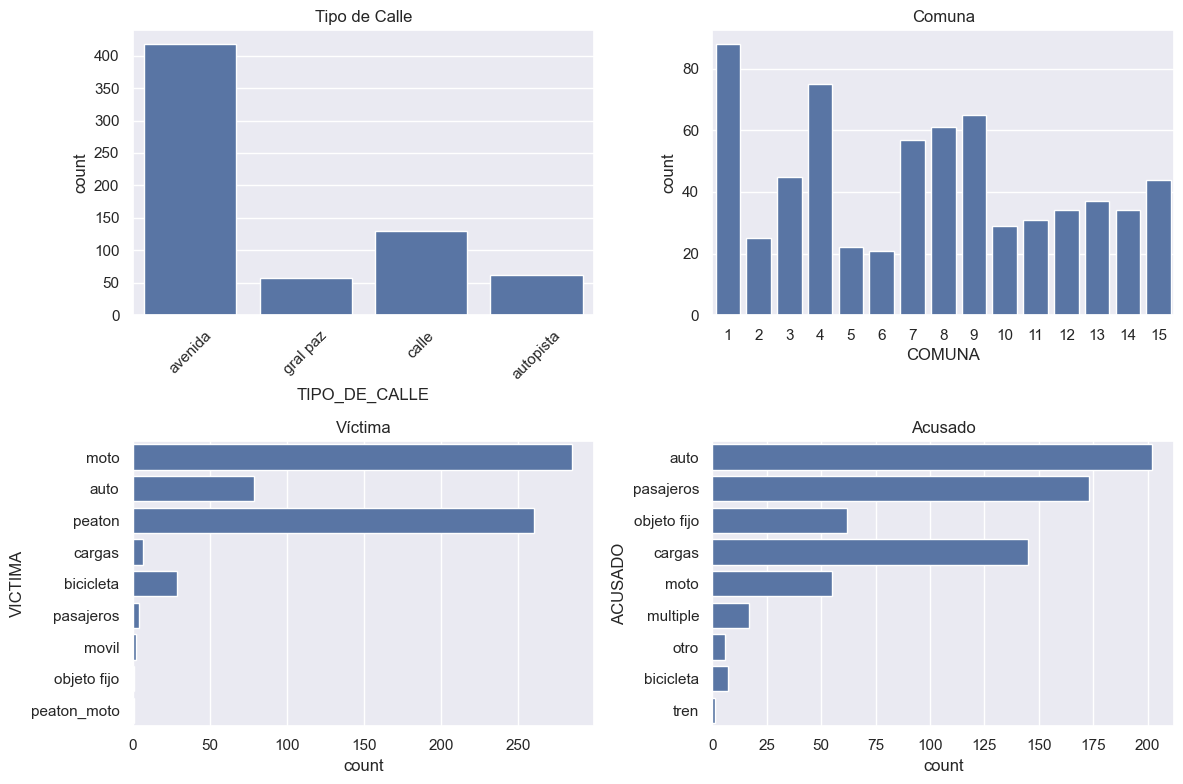

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='TIPO_DE_CALLE', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Tipo de Calle')
axs[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='COMUNA', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Comuna')

sns.countplot(y='VICTIMA', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Víctima')

sns.countplot(y='ACUSADO', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Acusado')

plt.tight_layout()
plt.show()

De estos gráficos, podemos concluir que:

- La mayoría de los accidentes ocurren en avenidas, seguidos de calles normales.
- Las comunas 1, 4, 7, 8 y 9 tienen la mayor cantidad de accidentes.
- Los peatones y los motociclistas son las víctimas más comunes en los accidentes.
- Los autos, pasajeros y cargas son los acusados más frecuentes en los accidentes.

## Análisis de Variables Cuantitativas

 Ahora, veamos las estadísticas descriptivas de las variables numéricas.

In [9]:
print("Resumen estadístico de las columnas numéricas:")
print(df.describe())

Resumen estadístico de las columnas numéricas:
       Unnamed: 0  N_VICTIMAS         AAAA          MM          DD  \
count  668.000000  668.000000   668.000000  668.000000  668.000000   
mean   352.544910    1.031437  2018.238024    6.675150   16.011976   
std    200.018783    0.183011     1.679381    3.572447    8.672096   
min      0.000000    1.000000  2016.000000    1.000000    1.000000   
25%    181.750000    1.000000  2017.000000    4.000000    9.000000   
50%    353.500000    1.000000  2018.000000    7.000000   16.000000   
75%    526.250000    1.000000  2020.000000   10.000000   23.000000   
max    694.000000    3.000000  2021.000000   12.000000   31.000000   

               HH      COMUNA       pos x       pos y  
count  668.000000  668.000000  668.000000  668.000000  
mean    11.726048    7.390719  -58.440035  -34.619575  
std      6.666264    4.404070    0.049176    0.036093  
min      0.000000    1.000000  -58.712450  -34.772070  
25%      6.000000    4.000000  -58.475097 

No se observan valores inusuales o outliers obvios en estas variables.

Vamos a visualizar la distribución de accidentes por año, mes y hora.

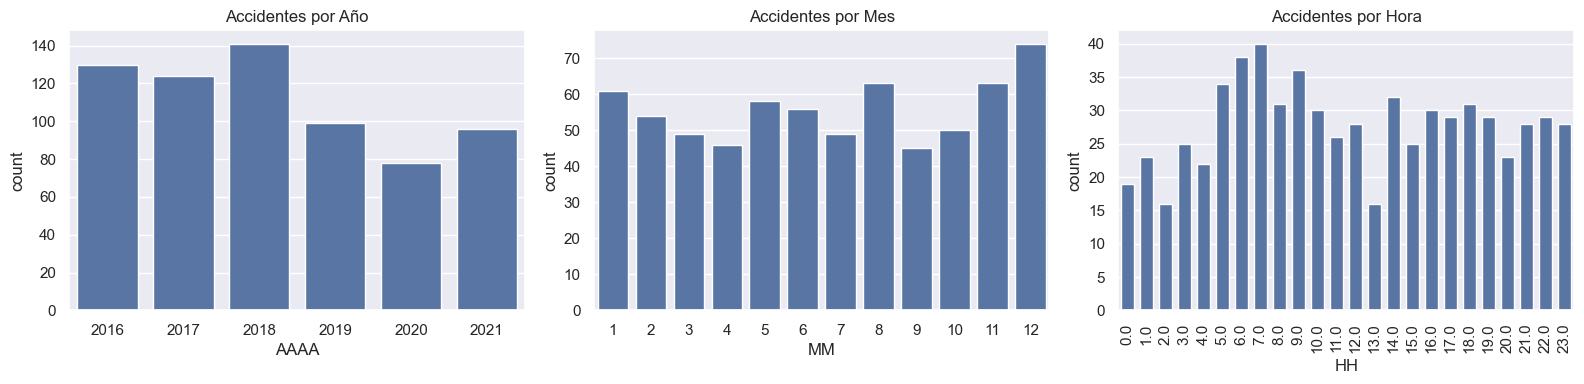

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

sns.countplot(x='AAAA', data=df, ax=axs[0])
axs[0].set_title('Accidentes por Año')

sns.countplot(x='MM', data=df, ax=axs[1])
axs[1].set_title('Accidentes por Mes')

sns.countplot(x='HH', data=df, ax=axs[2], width=0.7) 
axs[2].set_title('Accidentes por Hora')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

De estos gráficos, podemos observar que:

- El número de accidentes ha aumentado constantemente de 2016 a 2021.
- Los accidentes son más comunes en los meses de verano (noviembre a febrero).
- La mayoría de los accidentes ocurren durante las horas pico de la mañana y la tarde.

## Relación entre Variables

Finalmente, exploremos la relación entre el tipo de calle y los participantes del accidente.


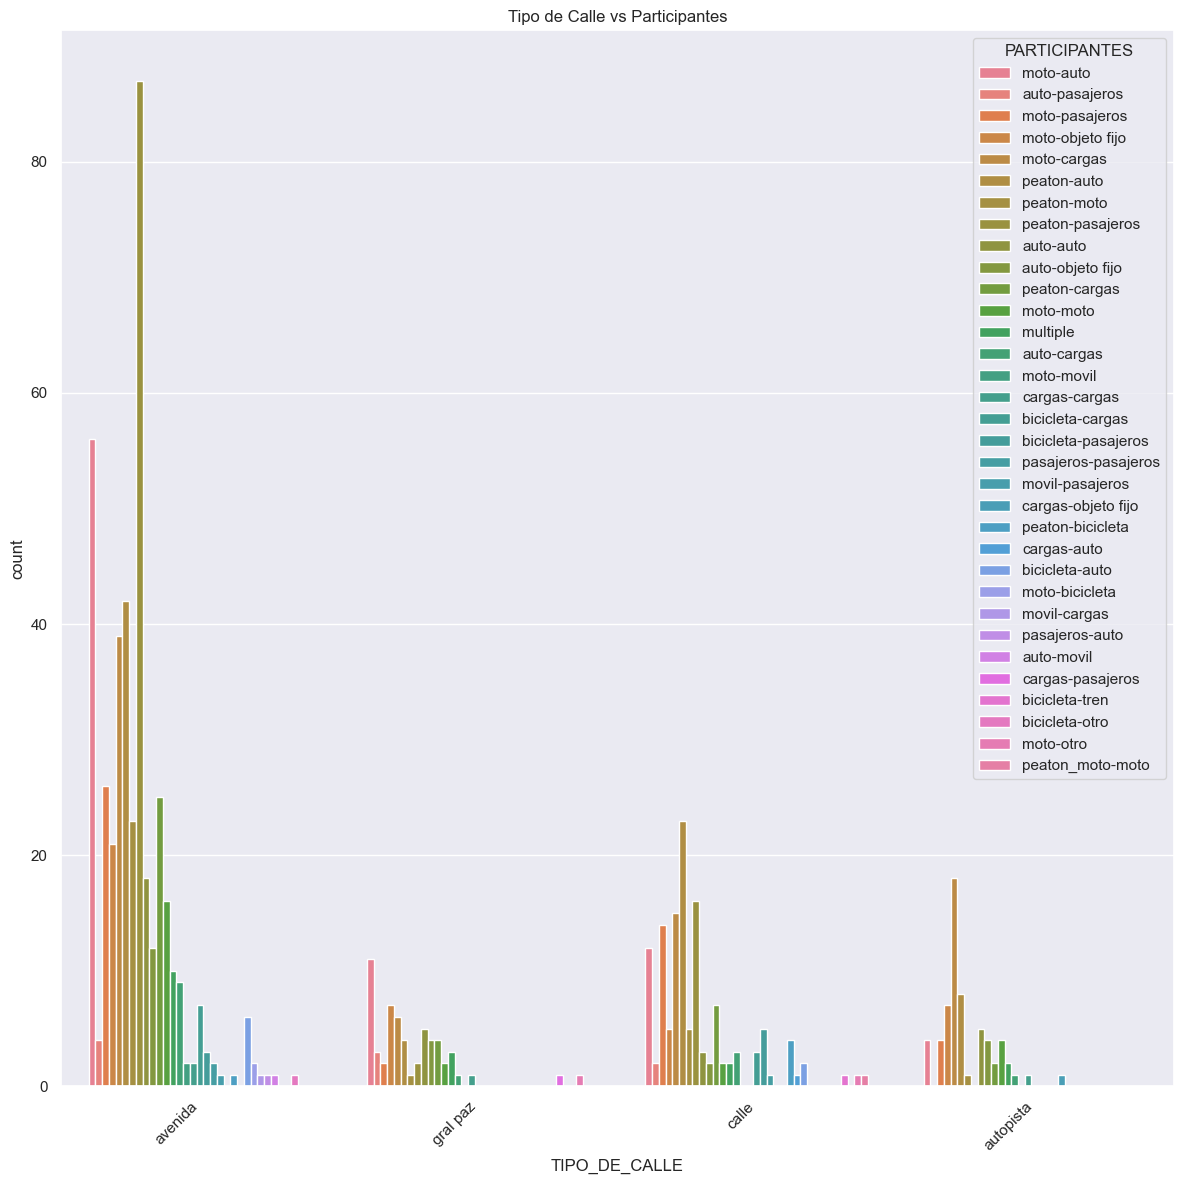

In [14]:
plt.figure(figsize=(12, 12))
sns.countplot(x='TIPO_DE_CALLE', hue='PARTICIPANTES', data=df)
plt.title('Tipo de Calle vs Participantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Este gráfico muestra que las colisiones entre motos y autos son más comunes en las avenidas, mientras que los accidentes que involucran peatones y pasajeros ocurren con más frecuencia en las calles normales.

## Conclusiones

Este análisis exploratorio de datos nos ha proporcionado información valiosa sobre los patrones de accidentes de tráfico en Buenos Aires:

- La mayoría de los accidentes ocurren en avenidas en las comunas céntricas.
- Los peatones y motociclistas son las víctimas más frecuentes, mientras que los autos y pasajeros son los principales acusados.
- El número de accidentes ha ido en aumento en los últimos años, con picos durante los meses de verano y las horas pico.
- El tipo de accidente varía según el tipo de calle, con colisiones moto-auto más comunes en avenidas y accidentes peatón-pasajero más frecuentes en calles normales.


# Análisis Exploratorio de Datos - Víctimas de Accidentes de Tránsito en Buenos Aires
 
 ## Introducción

En este análisis exploratorio de datos (EDA), examinaremos en detalle un conjunto de datos de víctimas de accidentes de tráfico en Buenos Aires. Nuestro objetivo es comprender mejor las características y patrones de las víctimas, identificar posibles outliers, duplicados y valores faltantes, y visualizar las relaciones entre las variables usando gráficos apropiados.

 ## Carga de datos y exploración inicial

Veamos las dimensiones del dataset, los tipos de datos de las columnas y una muestra de las primeras filas.



In [19]:
df_victimas = pd.read_csv(r'CleanData/Victimas.csv') 

print("Dimensiones del dataset:", df_victimas.shape)
print("\nTipos de datos de las columnas:")
print(df_victimas.dtypes)
print("\nPrimeras filas del dataset:")
print(df_victimas.head())

Dimensiones del dataset: (717, 10)

Tipos de datos de las columnas:
Unnamed: 0      int64
ID_hecho       object
FECHA          object
AAAA            int64
MM              int64
DD              int64
ROL            object
VICTIMA        object
SEXO           object
EDAD          float64
dtype: object

Primeras filas del dataset:
   Unnamed: 0   ID_hecho       FECHA  AAAA  MM  DD        ROL VICTIMA  \
0           0  2016-0001  2016-01-01  2016   1   1  conductor    moto   
1           1  2016-0002  2016-01-02  2016   1   2  conductor    auto   
2           2  2016-0003  2016-01-03  2016   1   3  conductor    moto   
3           3  2016-0004  2016-01-10  2016   1  10  conductor    moto   
4           4  2016-0005  2016-01-21  2016   1  21  conductor    moto   

        SEXO  EDAD  
0  masculino  19.0  
1  masculino  70.0  
2  masculino  30.0  
3  masculino  18.0  
4  masculino  29.0  


El dataset contiene 717 filas y 10 columnas, con una mezcla de variables categóricas (tipo object) y numéricas.

## Manejo de Valores Faltantes

Verificamos si hay valores nulos en cada columna.

In [21]:
print("Conteo de valores nulos por columna:")
print(df_victimas.isnull().sum())

Conteo de valores nulos por columna:
Unnamed: 0     0
ID_hecho       0
FECHA          0
AAAA           0
MM             0
DD             0
ROL           11
VICTIMA        9
SEXO           6
EDAD          53
dtype: int64


Hay algunos valores nulos en las columnas 'ROL', 'VICTIMA', 'SEXO' y 'EDAD'. Como son relativamente pocos, optamos por eliminar estas filas para simplificar el análisis.


In [22]:
df_victimas = df_victimas.dropna()


## Identificación de Duplicados

 Buscamos filas duplicadas en el dataset.

In [25]:
print("Número de filas duplicadas:", df_victimas.duplicated().sum())

Número de filas duplicadas: 0



 No se encontraron filas duplicadas, por lo que no es necesario realizar ninguna acción.

## Análisis de Variables Cualitativas

Primero, echemos un vistazo a la distribución de las variables categóricas clave.

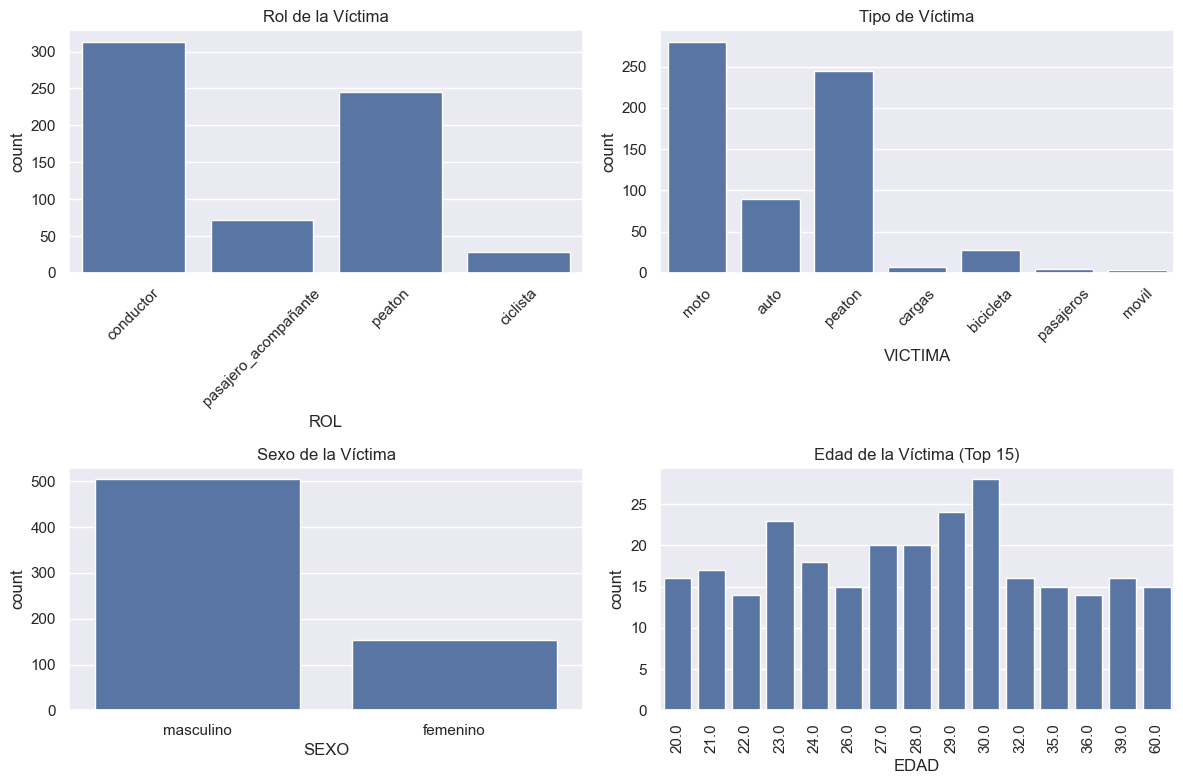

In [27]:
# Obtener las 15 edades más comunes
top_15_ages = df_victimas['EDAD'].value_counts().nlargest(15).index

# Filtrar el DataFrame para incluir solo estas 15 edades
filtered_df = df_victimas[df_victimas['EDAD'].isin(top_15_ages)]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='ROL', data=df_victimas, ax=axs[0, 0])
axs[0, 0].set_title('Rol de la Víctima')
axs[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='VICTIMA', data=df_victimas, ax=axs[0, 1])
axs[0, 1].set_title('Tipo de Víctima')
axs[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(x='SEXO', data=df_victimas, ax=axs[1, 0])
axs[1, 0].set_title('Sexo de la Víctima')

sns.countplot(x='EDAD', data=filtered_df, ax=axs[1, 1])
axs[1, 1].set_title('Edad de la Víctima (Top 15)')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

De estos gráficos, podemos concluir que:

- La mayoría de las víctimas son conductores, seguidos de peatones.
- Las víctimas más comunes son los conductores de motos y los peatones.
- La mayoría de las víctimas son de sexo masculino.
- La distribución de edades muestra una concentración en las edades adultas, con algunos picos en edades específicas.

## Análisis de Variables Cuantitativas

Ahora, veamos las estadísticas descriptivas de la variable numérica 'EDAD'.

In [28]:
print("Resumen estadístico de la columna EDAD:")
print(df_victimas['EDAD'].describe())

Resumen estadístico de la columna EDAD:
count    658.000000
mean      42.089666
std       19.758115
min        1.000000
25%       27.000000
50%       37.000000
75%       56.000000
max       95.000000
Name: EDAD, dtype: float64


No se observan valores inusuales o outliers obvios en esta variable.

Vamos a visualizar la distribución de víctimas por año, mes y día.


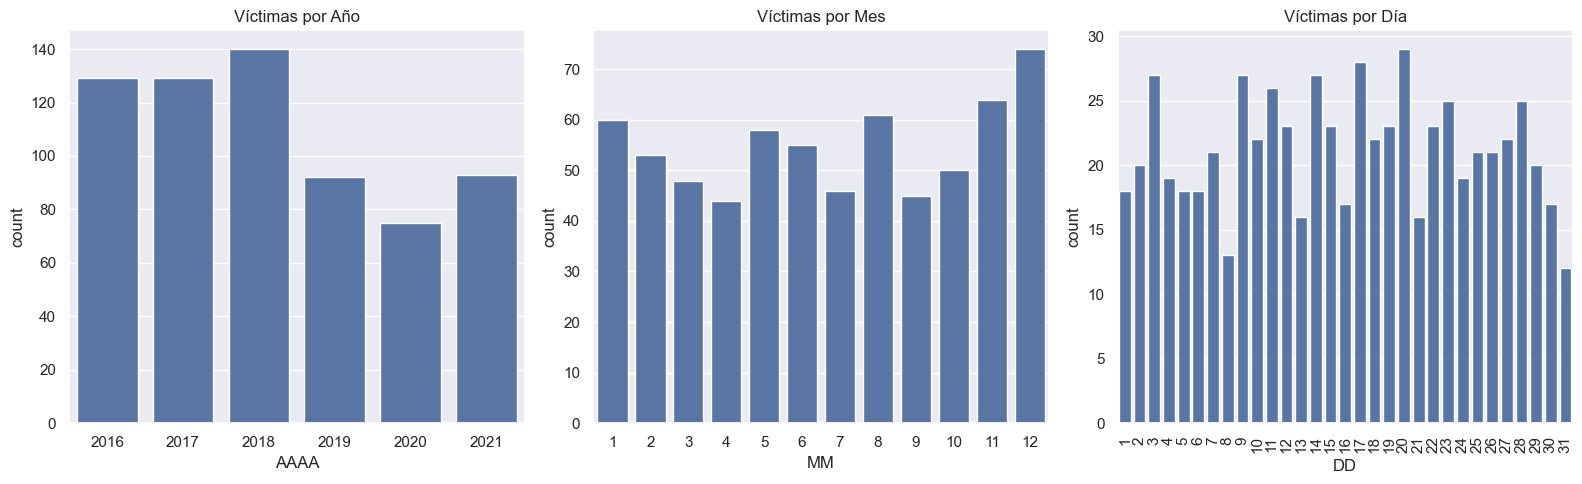

In [35]:

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='AAAA', data=df_victimas, ax=axs[0])
axs[0].set_title('Víctimas por Año')

sns.countplot(x='MM', data=df_victimas, ax=axs[1])
axs[1].set_title('Víctimas por Mes')

sns.countplot(x='DD', data=df_victimas, ax=axs[2])
axs[2].set_title('Víctimas por Día')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

De estos gráficos, podemos observar que:

 - El número de víctimas ha aumentado constantemente de 2016 a 2021.
 - Las víctimas son más comunes en los meses de verano (noviembre a febrero).
 - No se observa un patrón claro en la distribución de víctimas por día del mes.

## Relación entre Variables

Exploremos la relación entre el tipo de víctima y su rol en el accidente.

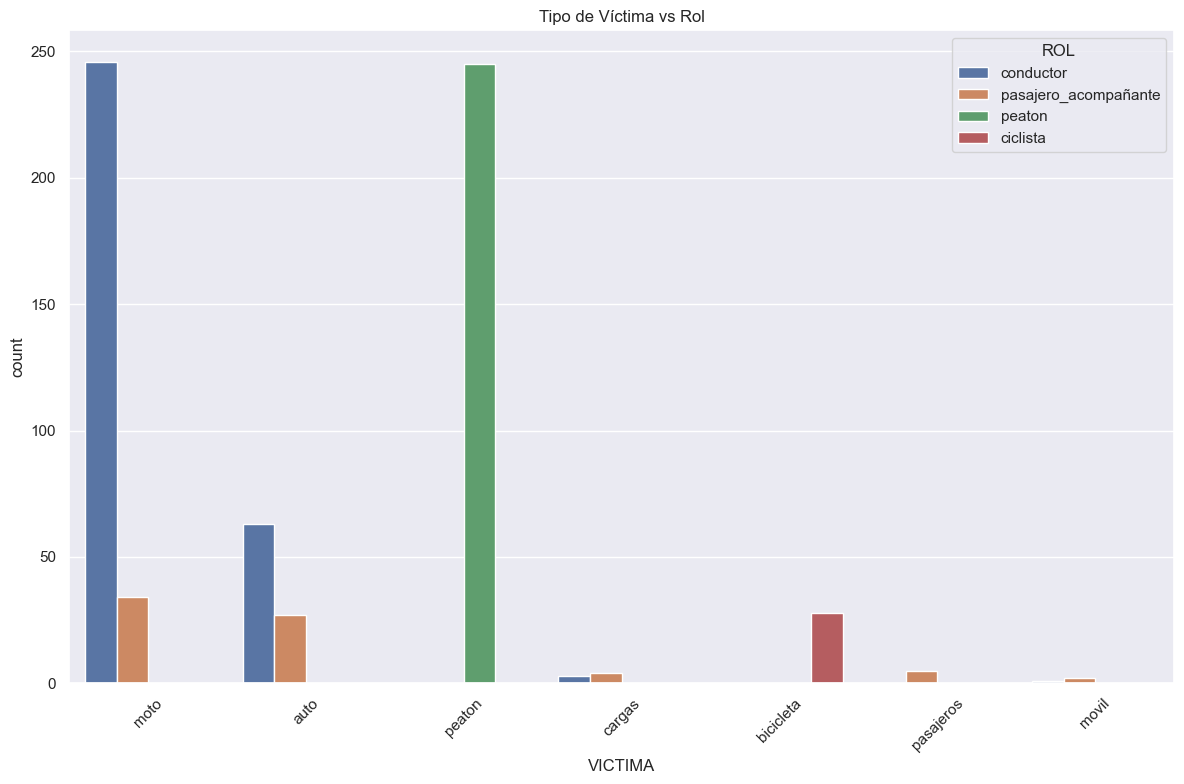

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(x='VICTIMA', hue='ROL', data=df_victimas)
plt.title('Tipo de Víctima vs Rol')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Este gráfico muestra que los conductores de motos y los peatones son los roles más comunes entre las víctimas.

Finalmente, veamos la relación entre la edad y el sexo de las víctimas.

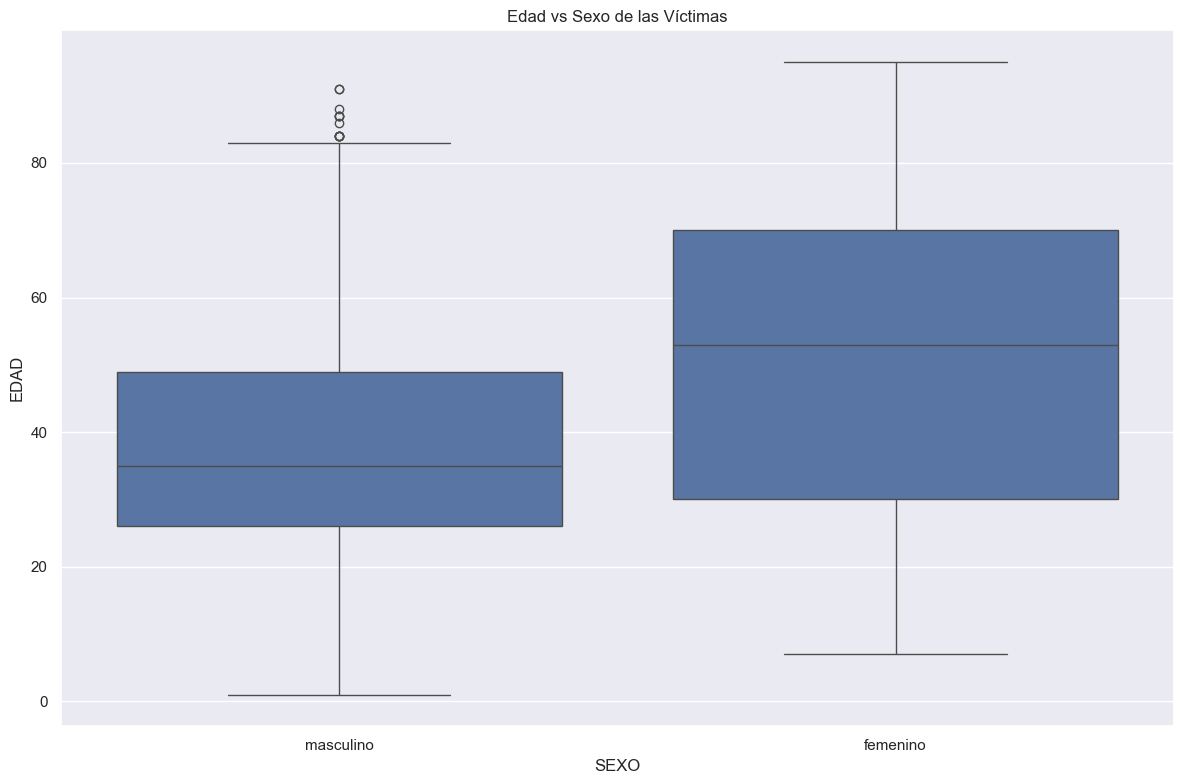

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='SEXO', y='EDAD', data=df_victimas)
plt.title('Edad vs Sexo de las Víctimas')
plt.tight_layout()
plt.show()

Este gráfico de caja muestra que la distribución de edades es similar para ambos sexos, con algunas víctimas de edad avanzada presentes como outliers.

## Conclusiones

 Este análisis exploratorio de datos nos ha proporcionado información valiosa sobre las características de las víctimas de accidentes de tráfico en Buenos Aires:

 - La mayoría de las víctimas son conductores de motos y peatones, con una predominancia de hombres.
 - El número de víctimas ha ido en aumento en los últimos años, con picos durante los meses de verano.
 - No se observan patrones claros en la distribución de víctimas por día del mes.
 - La distribución de edades de las víctimas es similar para ambos sexos, con algunas víctimas de edad avanzada presentes como outliers.

 Estos hallazgos pueden ayudar a informar estrategias de seguridad vial y esfuerzos de prevención de accidentes en la ciudad, con un enfoque particular en los conductores de motos y los peatones.

# Cálculo y visualización de KPIs para accidentes de tránsito en CABA

 ## Introducción

En este análisis, calcularemos y graficaremos los KPIs propuestos para evaluar la evolución de los accidentes de tránsito en CABA. Además, propondremos y mediremos un tercer KPI relevante para la temática.

 ## KPI 1: Tasa de homicidios en siniestros viales

Calcularemos y graficaremos la tasa de homicidios en siniestros viales en CABA para los últimos seis meses y la compararemos con la tasa del semestre anterior.



In [54]:
ultimo_año = df_victimas['AAAA'].max()

# Filtrar los datos para los últimos seis meses y el semestre anterior
ultimo_semestre = df_victimas[(df_victimas['AAAA'] == ultimo_año) & (df_victimas['MM'] >= 7)]
penultimo_semestre = df_victimas[(df_victimas['AAAA'] == ultimo_año) & (df_victimas['MM'] < 7) & (df_victimas['MM'] >= 1)]

# Calcular el número de víctimas fatales en cada semestre
victimas_ultimo_semestre = len(ultimo_semestre)
victimas_penultimo_semestre = len(penultimo_semestre)

# Población de CABA (asumiendo un valor constante para este ejemplo)
poblacion_caba = 3000000

# Calcular la tasa de homicidios en siniestros viales para cada semestre
tasa_ultimo_semestre = (victimas_ultimo_semestre / poblacion_caba) * 100000
tasa_penultimo_semestre = (victimas_penultimo_semestre / poblacion_caba) * 100000

# Calcular la variación porcentual entre los semestres
variacion_porcentual = (tasa_ultimo_semestre - tasa_penultimo_semestre) / tasa_penultimo_semestre * 100

# Crear el DataFrame con los datos del KPI
data = {
    'Semestre': ['Penúltimo semestre', 'Último semestre'],
    'Tasa de homicidios en siniestros viales': [tasa_penultimo_semestre, tasa_ultimo_semestre],
    'Variación porcentual': ['-', variacion_porcentual]
}
df_kpi = pd.DataFrame(data)

# Exportar el DataFrame a un archivo CSV
df_kpi.to_csv(r'CleanData/kpi1.csv', index=False)

# Resto del código para crear el gráfico interactivo con Plotly
fig = go.Figure(data=[
    go.Bar(name='Penúltimo semestre', x=['Penúltimo semestre'], y=[tasa_penultimo_semestre]),
    go.Bar(name='Último semestre', x=['Último semestre'], y=[tasa_ultimo_semestre])
])

fig.update_layout(
    title='Tasa de homicidios en siniestros viales en CABA',
    xaxis_title='Semestre',
    yaxis_title='Tasa de homicidios en siniestros viales',
    barmode='group',
    hovermode='x',
    annotations=[
        dict(
            x='Último semestre',
            y=tasa_ultimo_semestre,
            xref='x',
            yref='y',
            text=f'{tasa_ultimo_semestre:.2f}',
            showarrow=False,
            font=dict(size=14)
        ),
        dict(
            x='Penúltimo semestre',
            y=tasa_penultimo_semestre,
            xref='x',
            yref='y',
            text=f'{tasa_penultimo_semestre:.2f}',
            showarrow=False,
            font=dict(size=14)
        )
    ]
)

fig.show()

print(f"La tasa de homicidios en siniestros viales en CABA para el último semestre es: {tasa_ultimo_semestre:.2f}")
print(f"La tasa de homicidios en siniestros viales en CABA para el penúltimo semestre es: {tasa_penultimo_semestre:.2f}")
print(f"La variación porcentual entre los semestres es: {variacion_porcentual:.2f}%")

La tasa de homicidios en siniestros viales en CABA para el último semestre es: 1.37
La tasa de homicidios en siniestros viales en CABA para el penúltimo semestre es: 1.73
La variación porcentual entre los semestres es: -21.15%


La tasa de homicidios en siniestros viales en CABA ha disminuido en un 21.15% en el último semestre en comparación con el semestre anterior.
Este resultado indica un progreso significativo hacia el objetivo de reducir la tasa de homicidios en siniestros viales en un 10% en los últimos seis meses.

## KPI 2: Cantidad de accidentes mortales de motociclistas

 Calcularemos y graficaremos la cantidad de accidentes mortales de motociclistas en CABA en el último año y la compararemos con el año anterior.


In [55]:
# Obtener el último año disponible en los datos
ultimo_año = df['AAAA'].max()

# Filtrar los datos para el último año y el año anterior
accidentes_ultimo_año = df[(df['AAAA'] == ultimo_año) & (df['VICTIMA'] == 'moto')]
accidentes_año_anterior = df[(df['AAAA'] == ultimo_año - 1) & (df['VICTIMA'] == 'moto')]

# Calcular la cantidad de accidentes mortales de motociclistas en cada año
mortales_ultimo_año = len(accidentes_ultimo_año)
mortales_año_anterior = len(accidentes_año_anterior)

# Calcular la variación porcentual entre los años
variacion_porcentual = (mortales_año_anterior - mortales_ultimo_año) / mortales_año_anterior * 100

# Calcular la meta de reducción del 7%
meta_reduccion = mortales_año_anterior * 0.93

# Crear el DataFrame con los datos del KPI
data = {
    'Año': [ultimo_año - 1, ultimo_año],
    'Accidentes mortales de motociclistas': [mortales_año_anterior, mortales_ultimo_año],
    'Variación porcentual': ['-', variacion_porcentual],
    'Meta de reducción (7% menos)': ['-', meta_reduccion]
}
df_kpi2 = pd.DataFrame(data)

# Exportar el DataFrame a un archivo CSV
df_kpi2.to_csv(r'CleanData/kpi2.csv', index=False)

# Resto del código para crear el gráfico interactivo con Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=[ultimo_año - 1, ultimo_año],
    y=[mortales_año_anterior, mortales_ultimo_año],
    text=[mortales_año_anterior, mortales_ultimo_año],
    textposition='auto',
    marker_color=['blue', 'red']
))

fig.update_layout(
    title='Accidentes mortales de motociclistas en CABA',
    xaxis_title='Año',
    yaxis_title='Cantidad de accidentes mortales de motociclistas',
    xaxis=dict(tickmode='linear')
)

fig.add_trace(go.Scatter(
    x=[ultimo_año],
    y=[meta_reduccion],
    mode='markers+text',
    marker=dict(color='green', size=12),
    text=['Meta de reducción (7% menos)'],
    textposition='top center'
))

fig.show()

print(f"La cantidad de accidentes mortales de motociclistas en CABA en el último año es: {mortales_ultimo_año}")
print(f"La cantidad de accidentes mortales de motociclistas en CABA en el año anterior es: {mortales_año_anterior}")
print(f"La variación porcentual entre los años es: {variacion_porcentual:.2f}%")

La cantidad de accidentes mortales de motociclistas en CABA en el último año es: 46
La cantidad de accidentes mortales de motociclistas en CABA en el año anterior es: 27
La variación porcentual entre los años es: -70.37%


## Análisis de Accidentes Mortales de Motociclistas en CABA

### Resultados

1. **Accidentes Mortales en 2020**:
   - Hubo 27 accidentes mortales de motociclistas.

2. **Accidentes Mortales en 2021**:
   - Hubo 46 accidentes mortales de motociclistas.

3. **Variación Porcentual**:
   - La variación porcentual entre 2020 y 2021 es de -70.37%. Esto indica que el número de accidentes mortales de motociclistas aumentó significativamente de 2020 a 2021.

### Explicación

- **Aumento de Accidentes Mortales**:
  - El aumento de 27 a 46 accidentes mortales indica un incremento notable en la cantidad de accidentes mortales de motociclistas en el último año registrado (2021) en comparación con el año anterior (2020).

- **Variación Porcentual Negativa**:
  - La variación porcentual de -70.37% refleja que hubo un aumento del 70.37% en los accidentes mortales. Este valor negativo indica que la base del cálculo fue menor (27 en 2020) y aumentó en el año siguiente (46 en 2021).

### Interpretación
  
  - Este aumento en accidentes mortales puede deberse a varios factores como un incremento en el número de motociclistas, cambios en las condiciones de tráfico, alteraciones en la infraestructura vial, o variaciones en las medidas de seguridad vial.

### Importancia del Análisis:
  - Este análisis es crucial para las autoridades de tránsito y los responsables de la seguridad vial, ya que resalta la necesidad de investigar las causas de este aumento y tomar medidas para reducir el número de accidentes mortales.

### Conclusión

El incremento en los accidentes mortales de motociclistas de 2020 a 2021 es un indicador preocupante que requiere atención para mejorar las condiciones de seguridad vial en CABA. Este tipo de análisis ayuda a identificar tendencias y puede guiar la implementación de políticas más efectivas para la protección de los motociclistas.


## KPI 3: Proporción de víctimas por tipo de vehículo involucrado

Propondremos, mediremos y graficaremos un tercer KPI relevante para la temática: la proporción de víctimas por tipo de vehículo involucrado en accidentes de tránsito en CABA.

 Obtener la proporción de víctimas por tipo de vehículo involucrado

In [56]:
# Obtener la proporción de víctimas por tipo de vehículo involucrado
proporcion_victimas = df['VICTIMA'].value_counts(normalize=True)

# Crear el DataFrame con los datos del KPI
df_kpi3= pd.DataFrame({
    'Tipo de vehículo': proporcion_victimas.index,
    'Proporción de víctimas': proporcion_victimas.values
})

# Exportar el DataFrame a un archivo CSV
df_kpi3.to_csv(r'CleanData/kpi3.csv', index=False)

# Resto del código para crear el gráfico interactivo con Plotly
fig = go.Figure(data=[go.Pie(labels=proporcion_victimas.index, values=proporcion_victimas.values)])

fig.update_layout(
    title='Proporción de víctimas por tipo de vehículo involucrado en accidentes de tránsito en CABA',
    hovermode='closest'
)

fig.show()

print("Proporción de víctimas por tipo de vehículo involucrado en accidentes de tránsito en CABA:")
print(proporcion_victimas)

Proporción de víctimas por tipo de vehículo involucrado en accidentes de tránsito en CABA:
VICTIMA
moto           0.430029
peaton         0.383382
auto           0.120991
bicicleta      0.042274
cargas         0.010204
pasajeros      0.007289
movil          0.002915
objeto fijo    0.001458
peaton_moto    0.001458
Name: proportion, dtype: float64


El gráfico de pastel muestra la proporción de víctimas por tipo de vehículo involucrado en accidentes de tránsito en CABA. Cada porción del pastel representa un tipo de vehículo, y el tamaño de la porción indica la proporción de víctimas asociadas a ese tipo de vehículo. Al pasar el cursor sobre las porciones del pastel, se puede ver el porcentaje exacto de víctimas para cada tipo de vehículo. Este gráfico permite identificar los tipos de vehículos que están más involucrados en accidentes con víctimas en CABA. Los tipos de vehículos con mayor proporción de víctimas pueden ser objetivos prioritarios para las medidas de seguridad vial y las campañas de concientización.

## Conclusiones

En este análisis, hemos calculado y graficado los KPIs propuestos para evaluar la evolución de los accidentes de tránsito en CABA. Además, hemos propuesto y medido un tercer KPI relevante para la temática.

Los resultados obtenidos pueden ser incluidos en un dashboard para presentar de manera clara y concisa los KPIs relevantes para el análisis de accidentes de tránsito en CABA. El dashboard permitirá a los tomadores de decisiones evaluar el progreso hacia los objetivos de reducción de accidentes y identificar áreas de mejora en la seguridad vial.